In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('Data_Laba1\\nyt1.csv')
df2 = pd.read_csv('Data_Laba1\\nyt2.csv')
df3 = pd.read_csv('Data_Laba1\\nyt3.csv')
df4 = pd.read_csv('Data_Laba1\\nyt4.csv')
df5 = pd.read_csv('Data_Laba1\\nyt5.csv')
df6 = pd.read_csv('Data_Laba1\\nyt6.csv')
df7 = pd.read_csv('Data_Laba1\\nyt7.csv')
df8 = pd.read_csv('Data_Laba1\\nyt8.csv')
df9 = pd.read_csv('Data_Laba1\\nyt9.csv')
df10 = pd.read_csv('Data_Laba1\\nyt10.csv')

In [76]:
for i in range(1, 11):
    globals()[f'df{i}']['Day'] = f'{i}'

dfs = [globals()[f'df{i}'] for i in range(1, 11)]
df = pd.concat(dfs, ignore_index=True)
df

,Age,Gender,Impressions,Clicks,Signed_In,Day
0,36,0,3,0,1,1
1,73,1,3,0,1,1
2,30,0,3,0,1,1
3,49,1,3,0,1,1
4,47,1,11,0,1,1
...,...,...,...,...,...,...
4754363,0,0,5,0,0,10
4754364,0,0,5,1,0,10
4754365,31,0,4,0,1,10
4754366,57,0,6,0,1,10


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754368 entries, 0 to 4754367
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Age          int64 
 1   Gender       int64 
 2   Impressions  int64 
 3   Clicks       int64 
 4   Signed_In    int64 
 5   Day          object
dtypes: int64(5), object(1)
memory usage: 217.6+ MB


In [78]:
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754368 entries, 0 to 4754367
Data columns (total 6 columns):
 #   Column       Dtype
---  ------       -----
 0   Age          int64
 1   Gender       int64
 2   Impressions  int64
 3   Clicks       int64
 4   Signed_In    int64
 5   Day          int64
dtypes: int64(6)
memory usage: 217.6 MB


In [79]:
df.nlargest(5, ['Age'])

,Age,Gender,Impressions,Clicks,Signed_In,Day
3169105,112,1,7,0,1,7
573511,111,1,4,0,1,2
1348501,109,0,2,0,1,3
369076,108,0,3,0,1,1
1724901,108,0,6,0,1,4


In [80]:
print(len(df[df['Age'] == 0]))

1426678


In [81]:
df['Signed_In'].value_counts() #З'ясовуємо що к-сть неавторизованих користувачів рівно к-сті користувачів в яких age = 0

1    3327690
0    1426678
Name: Signed_In, dtype: int64

In [82]:
df['Signed_In'].value_counts(normalize=True)

1    0.699923
0    0.300077
Name: Signed_In, dtype: float64

In [83]:
df_gen0 = df.copy()
df_gen0.loc[df_gen0['Gender'] == 0, 'Gender'] = 'Female'
df_gen0.loc[df_gen0['Gender'] == 1, 'Gender'] = 'Male'
df_gen0['Gender'].value_counts(normalize=True)

Female    0.636434
Male      0.363566
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Signed_In', ylabel='count'>

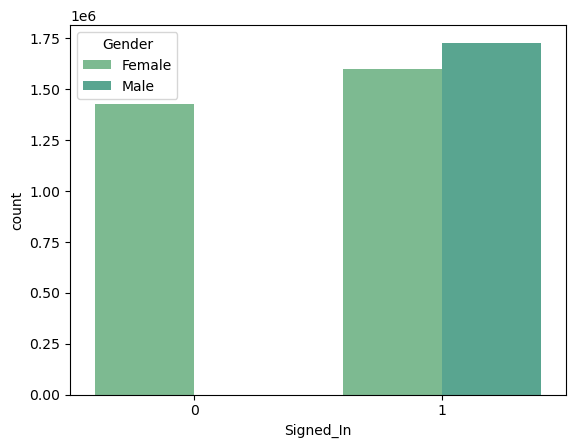

In [84]:
# З'ясовуємо що всі неавторизовані користувачі в датасеті мають gender=female
sns.set_palette("crest") 
sns.countplot(df_gen0, x="Signed_In", hue="Gender", saturation = 1)

In [85]:
df_age1 = df[(df['Age'] > 4) & (df['Age'] < 12)]
num_of_rows = len(df_age1)
print(f"The number of rows is {num_of_rows}")
df_age1.sample(5)

The number of rows is 5001


,Age,Gender,Impressions,Clicks,Signed_In,Day
3300736,11,1,4,0,1,7
2137660,11,0,11,0,1,5
3094696,11,1,1,0,1,7
2979629,10,1,7,0,1,7
1108609,11,1,11,2,1,3


In [86]:
#Видаляємо записи неавторизованих користувачів 
#Всі вони в статистиці за замовчуванням позначені як жінки і мають 0 років
df_age0 = df[df['Age'] != 0] 
df_age0.loc[df_age0.Age < 10].sample(5)

,Age,Gender,Impressions,Clicks,Signed_In,Day
3439979,9,1,4,0,1,8
2007457,9,0,8,1,1,5
2571271,8,1,7,0,1,6
3667924,9,1,2,0,1,8
3949897,9,1,1,0,1,9


In [87]:
df_age2 = df_age0.copy()
bins = [0, 17, 24, 34, 44, 54, 64, np.inf]
categories = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_age2['Age_group'] = pd.cut(df_age2['Age'], bins, labels=categories)
df_age2.sample(5)

,Age,Gender,Impressions,Clicks,Signed_In,Day,Age_group
2936928,29,1,5,0,1,7,25-34
1459551,33,1,8,1,1,4,25-34
2573590,76,0,5,0,1,6,65+
2105150,46,1,1,0,1,5,45-54
4624916,63,1,2,0,1,10,55-64


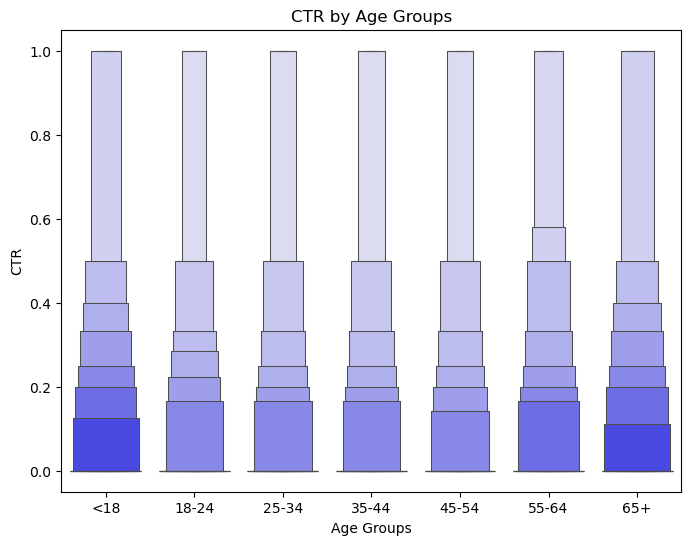

In [105]:
df_plot = df_age2.copy()
df_plot['CTR'] = df_plot['Clicks'] / df_plot['Impressions']
plt.figure(figsize=(8, 6))
#sns.barplot(x='Age_group', y='CTR', data=df_plot, errorbar=None)
#sns.boxplot(data=df_plot, x="Age_group", y="CTR", fill=False, gap=.1)
sns.boxenplot(
    data=df_plot, x="Age_group", y="CTR",
    color="b", width_method="linear",
)
plt.xlabel('Age Groups')
plt.ylabel('CTR')
plt.title('CTR by Age Groups')
plt.show()

In [89]:
df_age2.describe()

,Age,Gender,Impressions,Clicks,Signed_In,Day
count,3.327690e+06,3.327690e+06,3.327690e+06,3.327690e+06,3327690.0,3.327690e+06
mean,4.209600e+01,5.194372e-01,4.998497e+00,7.118452e-02,1.0,5.556827e+00
std,1.632766e+01,4.996221e-01,2.235307e+00,2.692942e-01,0.0,2.809890e+00
min,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00
25%,2.900000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.0,3.000000e+00
50%,4.100000e+01,1.000000e+00,5.000000e+00,0.000000e+00,1.0,6.000000e+00
75%,5.300000e+01,1.000000e+00,6.000000e+00,0.000000e+00,1.0,8.000000e+00
max,1.120000e+02,1.000000e+00,2.000000e+01,4.000000e+00,1.0,1.000000e+01


In [90]:
df_gen = df_age2.copy()
df_gen.loc[df_gen['Gender'] == 0, 'Gender'] = 'Female'
df_gen.loc[df_gen['Gender'] == 1, 'Gender'] = 'Male'

In [91]:
df_gen['Gender'].value_counts(normalize=True)

Male      0.519437
Female    0.480563
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Age Groups'}>

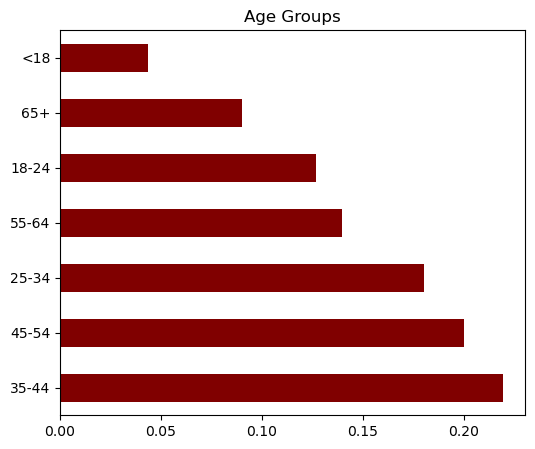

In [92]:
df_gen['Age_group'].value_counts(normalize=True).plot(kind='barh', title='Age Groups', ylabel='Percentage', xlabel='', figsize=(6, 5), color = 'maroon')

<AxesSubplot:xlabel='Age_group', ylabel='count'>

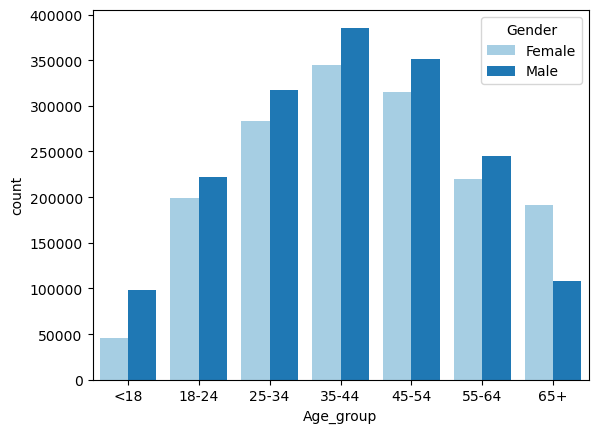

In [93]:
sns.set_palette("Paired")
sns.countplot(df_gen, x="Age_group", hue="Gender", saturation = 1)

<AxesSubplot:xlabel='Age_group', ylabel='percent'>

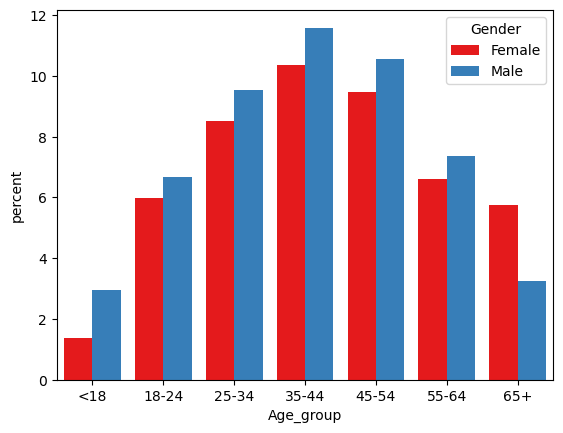

In [94]:
sns.set_palette("Set1")
sns.countplot(df_gen, x="Age_group", hue="Gender", saturation = 1, stat="percent")

In [95]:
df_gen.groupby('Age_group')['Clicks', 'Impressions'].describe().reset_index()

C:\Users\Everest\AppData\Local\Temp\ipykernel_720\2456789086.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gen.groupby('Age_group')['Clicks', 'Impressions'].describe().reset_index()


Age_group    Clicks                                               \
                count      mean       std  min  25%  50%  75%  max   
0       <18  144148.0  0.151393  0.389630  0.0  0.0  0.0  0.0  4.0   
1     18-24  421303.0  0.055157  0.236349  0.0  0.0  0.0  0.0  3.0   
2     25-34  600477.0  0.049962  0.223608  0.0  0.0  0.0  0.0  3.0   
3     35-44  730287.0  0.050691  0.224896  0.0  0.0  0.0  0.0  3.0   
4     45-54  666597.0  0.049793  0.223659  0.0  0.0  0.0  0.0  3.0   
5     55-64  465638.0  0.100499  0.316816  0.0  0.0  0.0  0.0  4.0   
6       65+  299240.0  0.149749  0.386481  0.0  0.0  0.0  0.0  4.0   

  Impressions                                                
        count      mean       std  min  25%  50%  75%   max  
0    144148.0  5.003094  2.244061  0.0  3.0  5.0  6.0  17.0  
1    421303.0  4.994208  2.238697  0.0  3.0  5.0  6.0  18.0  
2    600477.0  4.998796  2.236420  0.0  3.0  5.0  6.0  18.0  
3    730287.0  4.998325  2.233148  0.0  3.0  5.0  6.0  20.0  
4    666597.0  4.995231  2.233168  0.0  3.0  5.0  6.0  18.0  
5    465638.0  5.005040  2.234543  0.0  3.0  5.0  6.0  19.0  
6    299240.0  4.999231  2.235285  0.0  3.0  5.0  6.0  18.0

In [96]:
df_gen2 = df_gen.copy()
df_gen2['CTR'] = df_gen2['Clicks'] / df_gen2['Impressions']
# Групуємо дані за віковими категоріями
grouped_data1 = df_gen2.groupby('Age_group')
Mean = grouped_data1[['Clicks', 'Impressions']].mean()
Median = grouped_data1[['Clicks', 'Impressions']].median()
Variance = grouped_data1[['Clicks', 'Impressions']].var()
Max = grouped_data1[['Clicks', 'Impressions']].max()
Min = grouped_data1[['Clicks', 'Impressions']].min()
# Об'єднуємо отримані результати в один датафрейм
result_df = pd.concat([Mean, Median, Variance, Max, Min],
                      keys=['Mean', 'Median', 'Variance', 'Max', 'Min'], axis=1)
result_df

Mean             Median              Variance              \
             Clicks Impressions Clicks Impressions    Clicks Impressions   
Age_group                                                                  
<18        0.151393    5.003094    0.0         5.0  0.151811    5.035808   
18-24      0.055157    4.994208    0.0         5.0  0.055861    5.011763   
25-34      0.049962    4.998796    0.0         5.0  0.050000    5.001572   
35-44      0.050691    4.998325    0.0         5.0  0.050578    4.986949   
45-54      0.049793    4.995231    0.0         5.0  0.050023    4.987041   
55-64      0.100499    5.005040    0.0         5.0  0.100372    4.993184   
65+        0.149749    4.999231    0.0         5.0  0.149367    4.996501   

             Max                Min              
          Clicks Impressions Clicks Impressions  
Age_group                                        
<18            4          17      0           0  
18-24          3          18      0           0  
25-34          3          18      0           0  
35-44          3          20      0           0  
45-54          3          18      0           0  
55-64          4          19      0           0  
65+            4          18      0           0

In [97]:
df_gen3 = df_gen.copy()
grouped_data2 = df_gen3.groupby(['Age_group', 'Gender']).agg({
    'Clicks': ['mean', 'median', 'var', 'max', 'min'],
    'Impressions': ['mean', 'median', 'var', 'max', 'min']
}).reset_index()

grouped_data2.columns = ['age_group', 'Gender', 'Mean_Clicks', 'Median_Clicks', 'Var_Clicks', 'Max_Clicks', 'Min_Clicks',
                         'Mean_Impressions', 'Median_Impressions', 'Var_Impressions', 'Max_Impressions', 'Min_Impressions']
grouped_data2

,age_group,Gender,Mean_Clicks,Median_Clicks,Var_Clicks,Max_Clicks,Min_Clicks,Mean_Impressions,Median_Impressions,Var_Impressions,Max_Impressions,Min_Impressions
0,<18,Female,0.152488,0.0,0.151790,3,0,5.022155,5.0,5.017172,17,0
1,<18,Male,0.150890,0.0,0.151822,4,0,4.994329,5.0,5.044185,16,0
2,18-24,Female,0.055140,0.0,0.055900,3,0,4.996060,5.0,5.009504,17,0
3,18-24,Male,0.055173,0.0,0.055826,3,0,4.992552,5.0,5.013802,18,0
4,25-34,Female,0.050571,0.0,0.050712,3,0,4.997288,5.0,4.991429,18,0
5,25-34,Male,0.049418,0.0,0.049365,3,0,5.000142,5.0,5.010637,17,0
6,35-44,Female,0.050958,0.0,0.050746,3,0,4.999632,5.0,4.989991,18,0
7,35-44,Male,0.050452,0.0,0.050428,3,0,4.997157,5.0,4.984239,20,0
8,45-54,Female,0.049803,0.0,0.049942,3,0,4.990947,5.0,4.982149,18,0
9,45-54,Male,0.049784,0.0,0.050096,3,0,4.999077,5.0,4.991418,18,0


In [118]:
df_gen4 = df.copy()
df_gen4['CTR'] = df_gen4['Clicks'] / df_gen4['Impressions']
df_gen4.isnull().sum()

Age                0
Gender             0
Impressions        0
Clicks             0
Signed_In          0
Day                0
CTR            32001
dtype: int64

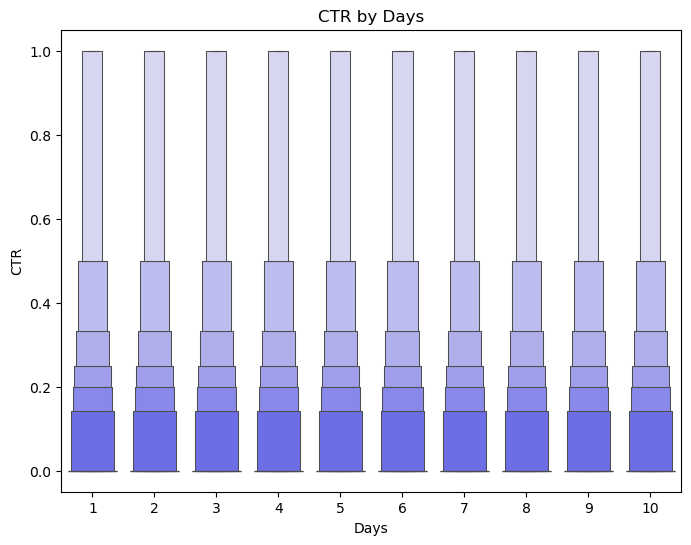

In [119]:
df_gen4 = df_gen4.dropna(subset=['CTR'])
plt.figure(figsize=(8, 6))
#sns.barplot(x='Age_group', y='CTR', data=df_plot, errorbar=None)
#sns.boxplot(data=df_plot, x="Age_group", y="CTR", fill=False, gap=.1)
sns.boxenplot(
    data=df_gen4, x="Day", y="CTR",
    color="b", width_method="linear",
)
plt.xlabel('Days')
plt.ylabel('CTR')
plt.title('CTR by Days')
plt.show()

In [120]:
from scipy.stats import f_oneway
# Створимо списки CTR для кожної групи днів
ctr_day1 = df_gen4[df_gen4['Day'] == 1]['CTR']
ctr_day2 = df_gen4[df_gen4['Day'] == 2]['CTR']
ctr_day3 = df_gen4[df_gen4['Day'] == 3]['CTR']
ctr_day4 = df_gen4[df_gen4['Day'] == 4]['CTR']
ctr_day5 = df_gen4[df_gen4['Day'] == 5]['CTR']
ctr_day6 = df_gen4[df_gen4['Day'] == 6]['CTR']
ctr_day7 = df_gen4[df_gen4['Day'] == 7]['CTR']
ctr_day8 = df_gen4[df_gen4['Day'] == 8]['CTR']
ctr_day9 = df_gen4[df_gen4['Day'] == 9]['CTR']
ctr_day10 = df_gen4[df_gen4['Day'] == 10]['CTR']
# Виконаємо ANOVA тест
f_statistic, p_value = f_oneway(ctr_day1, ctr_day2, ctr_day3, ctr_day4, ctr_day5, ctr_day6, ctr_day7, ctr_day8, ctr_day9, ctr_day10)
# Виведемо результат тесту
print("ANOVA F-статистика:", f_statistic)
print("p-значення:", p_value)
# Інтерпретуємо результат тесту
alpha = 0.05
if p_value < alpha:
    print("Є статистично значущі різниці між середніми значеннями груп.")
else:
    print("Немає статистично значущих різниць між середніми значеннями груп.")

ANOVA F-статистика: 0.39642463069634665
p-значення: 0.9374917437120317
Немає статистично значущих різниць між середніми значеннями груп.


<AxesSubplot:xlabel='Day', ylabel='percent'>

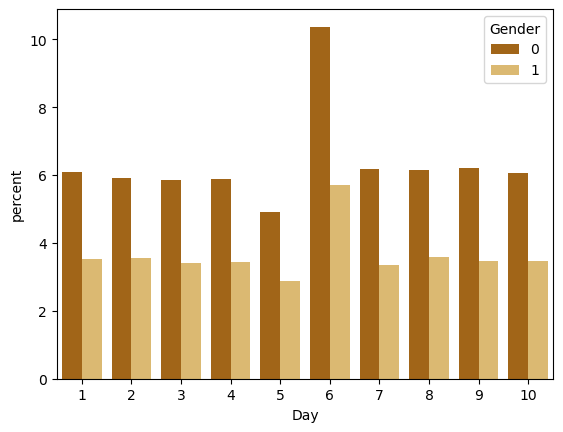

In [117]:
sns.set_palette("BrBG")
sns.countplot(df, x="Day", hue="Gender", saturation = 3, stat="percent")

<AxesSubplot:xlabel='Day', ylabel='percent'>

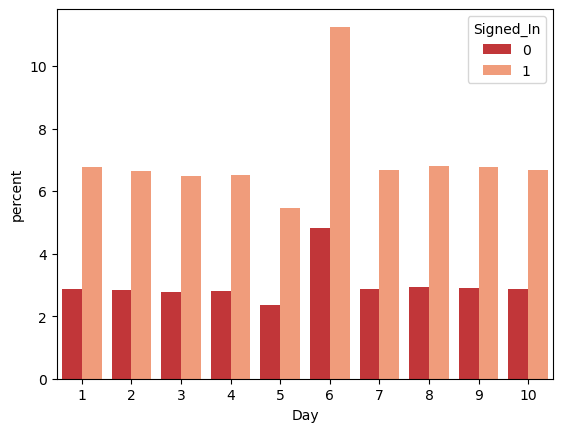

In [116]:
sns.set_palette("RdBu")
sns.countplot(df, x="Day", hue="Signed_In", saturation = 3, stat="percent")